In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import plotly.express as px
from tabulate import tabulate
from IPython.display import display



# Set the style for seaborn plots
sns.set(style="whitegrid")

In [2]:
df = pd.read_excel('OrderList.xlsx')
display(df.head())

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              9215 non-null   float64       
 1   Order Date            9215 non-null   datetime64[ns]
 2   Origin Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service Level         9215 non-null   object        
 6   Ship ahead day count  9215 non-null   int64         
 7   Ship Late Day count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product ID            9215 non-null   int64         
 10  Plant Code            9215 non-null   object        
 11  Destination Port      9215 non-null   object        
 12  Unit quantity         9215 non-null   int64         
 13  Weight            

In [4]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           Order ID          TPT  Ship ahead day count  Ship Late Day count  \
count  9.215000e+03  9215.000000           9215.000000          9215.000000   
mean   1.447274e+09     1.717743              1.852306             0.039935   
std    8.381629e+04     0.630500              1.922302             0.319625   
min    1.447126e+09     0.000000              0.000000             0.000000   
25%    1.447197e+09     1.000000              0.000000             0.000000   
50%    1.447276e+09     2.000000              3.000000             0.000000   
75%    1.447346e+09     2.000000              3.000000             0.000000   
max    1.447425e+09     4.000000              6.000000             6.000000   

         Product ID  Unit quantity       Weight  
count  9.215000e+03    9215.000000  9215.000000  
mean   1.680536e+06    3202.747151    19.871688  
std    1.526593e+04   15965.622260    66.569064  
min    1.613321e+06     235.000000     0.000000  
25%    1.669702e+

In [5]:
# Display unique values in categorical columns excluding 'Dt_Customer'
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"{column}: {df[column].unique()}")

# Display value counts for categorical columns excluding 'Dt_Customer'
print("\nValue Counts for Categorical Columns:")
for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\n{column}:\n{df[column].value_counts()}")



Unique Values in Categorical Columns:
Origin Port: ['PORT09' 'PORT04' 'PORT05']
Carrier: ['V44_3' 'V444_0' 'V444_1']
Service Level: ['CRF' 'DTP' 'DTD']
Customer: ['V55555_53' 'V555555555555555_29' 'V5555555_30' 'V55555_2'
 'V555555555555_31' 'V55555555_32' 'V5555555_12' 'V55555_4' 'V555555_6'
 'V5555555555_1' 'V5555_33' 'V555555_24' 'V555555555_3' 'V55555555_5'
 'V55555555_7' 'V55555555555_28' 'V55555555_0' 'V5555555_22' 'V555555_34'
 'V5555_25' 'V55_13' 'V555555555_35' 'V5555_36' 'V55_37' 'V5555_38'
 'V55_39' 'V555555555_14' 'V55555_26' 'V555_15' 'V555555555_27'
 'V555555_40' 'V555_41' 'V555555555555555555_42' 'V55555555555555_8'
 'V55555555_9' 'V55555_10' 'V555555_11' 'V5555555555555_16'
 'V555555555555555555_17' 'V555555555555555_44' 'V555555555555555555_45'
 'V555555555555555_23' 'V555555555555555555_46' 'V55_47' 'V5555555_19'
 'V5555_20']
Plant Code: ['PLANT16' 'PLANT03' 'PLANT08' 'PLANT04' 'PLANT12' 'PLANT09' 'PLANT13']
Destination Port: ['PORT09']

Value Counts for Categorical 

In [16]:
# Select the desired columns
selected_columns = ['Order ID', 'Ship ahead day count', 'Ship Late Day count']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns].copy()

In [17]:
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              9215 non-null   float64
 1   Ship ahead day count  9215 non-null   int64  
 2   Ship Late Day count   9215 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 216.1 KB
None


/Users/nikhilreddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/nikhilreddy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


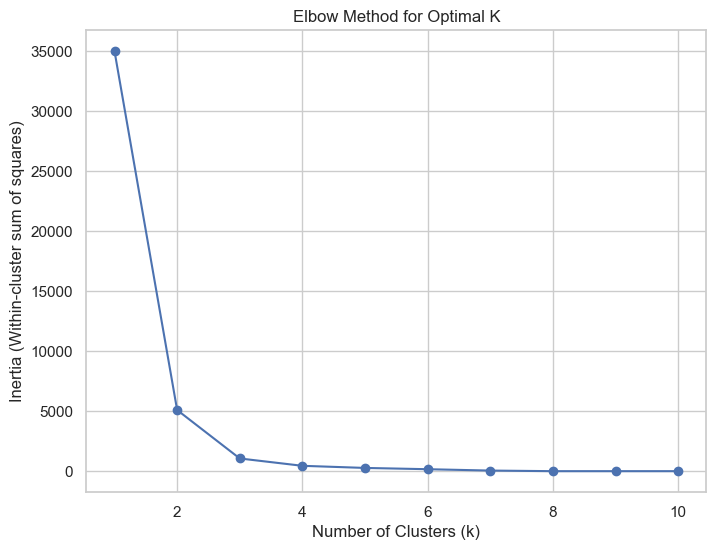

In [18]:
# Extract features for clustering
X = df_selected.drop(['Order ID'], axis=1)  # Assuming 'ID' should not be used for clustering

# Initialize an empty list to store inertia values
inertia_values = []

# Define a range of k values to test
k_values = range(1, 11)

# Perform k-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.show()


In [19]:
optimal_k = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, n_init=50, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(X)

In [20]:
# Display the clustered data
print(df_selected[['Order ID', 'Cluster']])

          Order ID  Cluster
0     1.447296e+09        0
1     1.447158e+09        0
2     1.447139e+09        0
3     1.447364e+09        0
4     1.447364e+09        0
...            ...      ...
9210  1.447305e+09        2
9211  1.447319e+09        2
9212  1.447322e+09        2
9213  1.447145e+09        2
9214  1.447328e+09        2

[9215 rows x 2 columns]


In [21]:
# Customer profiling
for cluster_num in range(optimal_k):
    cluster_data = df_selected[df_selected['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Profile:")
    print(cluster_data.describe(include='all'))



Cluster 0 Profile:
           Order ID  Ship ahead day count  Ship Late Day count  Cluster
count  3.206000e+03                3206.0          3206.000000   3206.0
mean   1.447271e+09                   3.0             0.042732      0.0
std    8.186431e+04                   0.0             0.240349      0.0
min    1.447135e+09                   3.0             0.000000      0.0
25%    1.447195e+09                   3.0             0.000000      0.0
50%    1.447270e+09                   3.0             0.000000      0.0
75%    1.447345e+09                   3.0             0.000000      0.0
max    1.447423e+09                   3.0             3.000000      0.0

Cluster 1 Profile:
           Order ID  Ship ahead day count  Ship Late Day count  Cluster
count  4.543000e+03           4543.000000          4543.000000   4543.0
mean   1.447276e+09              0.025754             0.045565      1.0
std    8.437284e+04              0.158418             0.366943      0.0
min    1.447126e+09     

In [22]:
centroids = kmeans.cluster_centers_

# Display the centroid values
print("Centroid Values:")
print(centroids)


Centroid Values:
[[3.         0.04273238]
 [0.02575391 0.0455646 ]
 [5.00272851 0.01637108]]


In [23]:
# Merge the DataFrames based on the 'Id' column using outer join
merged_df = pd.merge(df, df_selected, on='Order ID', how='outer')

# Export the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)